# Simulations - 1 

In [96]:
library(repr)
options(repr.plot.width=7, repr.plot.height=7, repr.plot.res = 120, repr.plot.quality = 30)
options(jupyter.plot_mimetypes = 'image/png')

setwd("~/yandexDisk/DIPLOMA/CODE/")
source("./src/simulations.functions.R", echo=FALSE)
debug.file <- ".various.Rdata/Iter.info"

In [60]:
# Defining control execution constants 
train.data.sample.sizes <- c(50, 100, 200, 400, 800)
test.data.sample.size <- 10000
number.of.covariates = 30
sample.size <- 100
offsets = seq(0.2, 1, length = 10)
control.offset = min(offsets) / 2
lambdas = seq(0,  10,  length=12)

registerDoParallel(cores = 4)
number.of.simulations <- 3

offset = 0.3
lambda = 0.02

In [61]:
# prepare train data
train <- GetSimulationData(sample.size, number.of.covariates)
# prepare test data
test <- GetSimulationData(test.data.sample.size, number.of.covariates)

In [41]:
#save.image(".various.Rdata/MM_is_total_looser_large_sample.17.03.16")

In [87]:
opt.params = list("opt.func"=DCOptimizeWithMML2Penalized, "debug.file"=debug.file, "approximation.eps"=1e-5, "tolerance"=1e-7)
#opt.params = list("opt.func"=DCOptimizeWithMML2Penalized, "debug.file"=debug.file, "approximation.eps"=NULL, "tolerance"=1e-7)
pars.dca <- OptimizeParamsOfPolicyFunction(train, offset, PolicyFunLinearKernel, lambda=0, opt.hyperparams=opt.params)
pars.dca

Converged after  78  iterations


[1]  1.077748909  0.143702952 -0.030483379  0.048793500 -0.091943168
 [6]  0.075712389  0.017089275 -0.266121435  0.278218007  0.055009432
[11] -0.154191898  0.075502062 -0.055304119 -0.217574927  0.002610510
[16] -0.210247585  0.020125554 -0.165367241 -0.031189865  0.119140886
[21]  0.157439979 -0.143322476 -0.184118808 -0.188328686  0.138657393
[26] -0.028850762 -0.007554349  0.162675709 -0.089165886 -0.174417128
[31]  0.339096036

In [43]:
load(debug.file)
iter.info.df <- as.data.frame(t(sapply(iter.info, cbind)))
colnames(iter.info.df) <- names(iter.info[[1]])
#save.image("../.various.Rdata/TestingOptimdump")

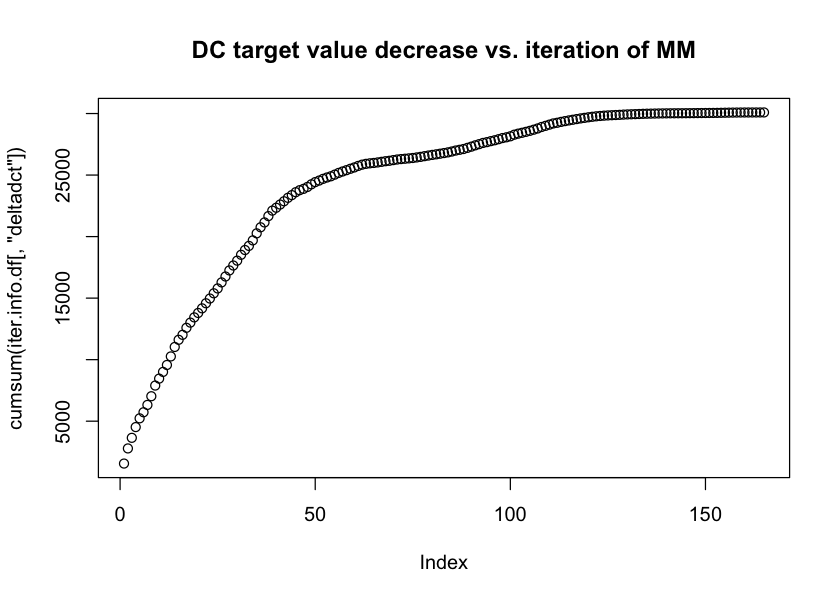

In [44]:
plot(cumsum(iter.info.df[, "deltadct"]), main="DC target value decrease vs. iteration of MM")

In [45]:
tmp.dir = "/tmp/pngslides/"
system(paste("mkdir -p ", tmp.dir))
system(paste("rm -vf ", tmp.dir, "*", sep=""))
f <- function(row) {
    png(paste(tmp.dir, sprintf("%03d", as.numeric(row["iteration"])), ".png", sep = ""),
        width = 1000, height = 900, units = "px", pointsize = 17, res=100)
    PlotDecsionsVersusObserved(train, PolicyFunLinearKernel, as.matrix(unlist(row["params"])), 
                               offset=offset, title = paste("Iteration #", row["iteration"]))
    dev.off()
}
apply(iter.info.df, 1, f)

src = paste(tmp.dir, "*.png", sep="")
dst = paste(tmp.dir, "process.gif", sep="")
system(paste("convert", src, "-delay 120 -loop 1 process.gif", dst))

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [46]:
iter.info.df[, c("valuefunc.train", "valuefunc.test", "obj.func.train", "obj.func.test", "deltadct", "dct", "discrepancy" )]

valuefunc.train valuefunc.test obj.func.train obj.func.test  deltadct
1          1.679591       1.695037       105.1017      112.0645  1556.633
2          1.694883        1.69513       104.9712      112.0885  1229.243
3          1.704295       1.693748       104.8781       112.102  861.6943
4          1.711881       1.686733       104.7858      112.1197   872.303
5          1.713507        1.67622       104.7083      112.1306  710.7931
6          1.714154       1.668097       104.6562      112.1337  494.3068
7          1.717913       1.660504        104.592      112.1515  596.6037
8           1.72274       1.652214       104.5101      112.1789  705.8161
9           1.73063       1.645124       104.4164      112.2111  867.6261
10          1.73058       1.636114       104.3563      112.2288  564.3362
11         1.728968       1.627687       104.2975      112.2419  544.7383
12         1.732468       1.623877       104.2347      112.2512  562.9902
13         1.736603       1.616299       104.1595      112.2648  694.7137
14         1.739296       1.607123       104.0788      112.2827  768.9899
15         1.737021       1.596919       104.0173      112.2918  582.7917
16         1.740212       1.595754       103.9743      112.3033  404.2062
17         1.744731       1.592957       103.9161      112.3221  570.1252
18         1.748465       1.588995       103.8702      112.3419  421.9112
19         1.752074       1.586836       103.8241      112.3575  425.3021
20         1.761283       1.592523       103.7858       112.365  358.9429
21          1.77232       1.600258       103.7457      112.3658  374.7854
22         1.779328       1.601983       103.7005      112.3665  411.9549
23         1.777514       1.595032       103.6573      112.3675  385.9342
24         1.772572       1.584795       103.6099      112.3697  424.3091
25         1.771425       1.579409       103.5671      112.3764  395.7553
26         1.769526       1.573185        103.516      112.3785  490.5242
27         1.772814       1.571607       103.4625      112.3786  479.1053
28          1.77871       1.572806       103.4113      112.3815  493.4701
29         1.783642       1.574439       103.3688      112.3888  401.5635
30         1.789896       1.576258       103.3266      112.3867  394.0522
31         1.787888       1.568892       103.2743      112.3826  475.4386
32         1.786478        1.56279        103.231      112.3826  388.3369
33          1.78102       1.552324       103.1943      112.3837  334.8426
34         1.773843       1.541107       103.1439      112.3832  447.1471
35         1.769359        1.53186       103.0805      112.3883  572.3531
36         1.765773       1.524391       103.0272      112.3946    492.54
37         1.760923       1.515396       102.9842      112.3969   394.465
38         1.753552       1.503465       102.9309      112.4008  514.3169
39         1.748185       1.495856       102.8837      112.4039  445.6424
40         1.744125       1.491324       102.8595      112.4087  234.2665
41         1.737696       1.485253       102.8319      112.4178  261.0194
42           1.7321       1.479195       102.8038      112.4221  264.3429
43         1.723452       1.470999       102.7745      112.4277   280.854
44         1.718861       1.466369       102.7517      112.4323  219.6385
45         1.713269       1.459101       102.7271      112.4397  235.8494
46         1.712369       1.456473       102.7102      112.4464  163.4598
47         1.708733        1.45238       102.6988      112.4486  108.5764
48         1.704628       1.446851        102.682      112.4511  154.4482
49         1.698775       1.438912       102.6595      112.4596  214.1007
50         1.697094       1.435472       102.6407      112.4616  181.3129
51          1.69276       1.430001       102.6274      112.4619  124.6794
52         1.685769       1.421988       102.6132      112.4644  138.3694
53          1.67856        1.41367       102.6017      112.4717   110.041
54      

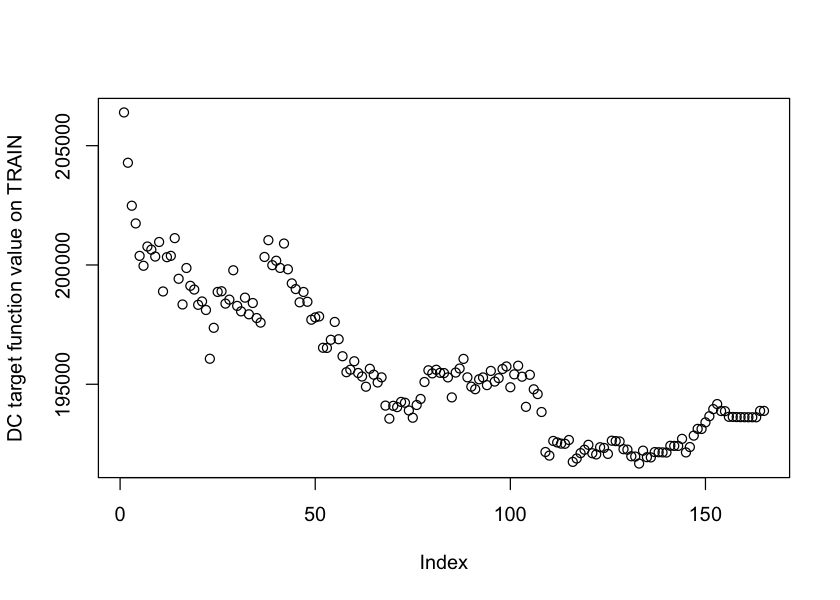

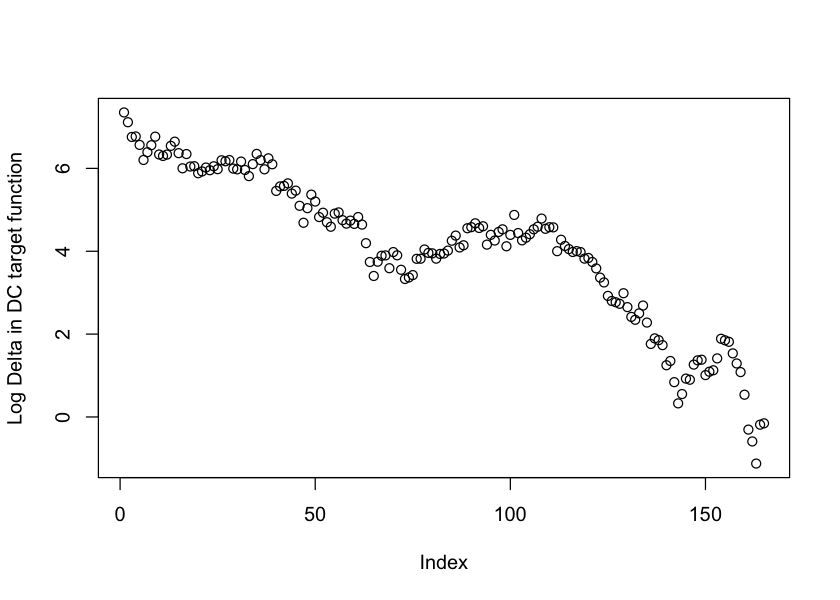

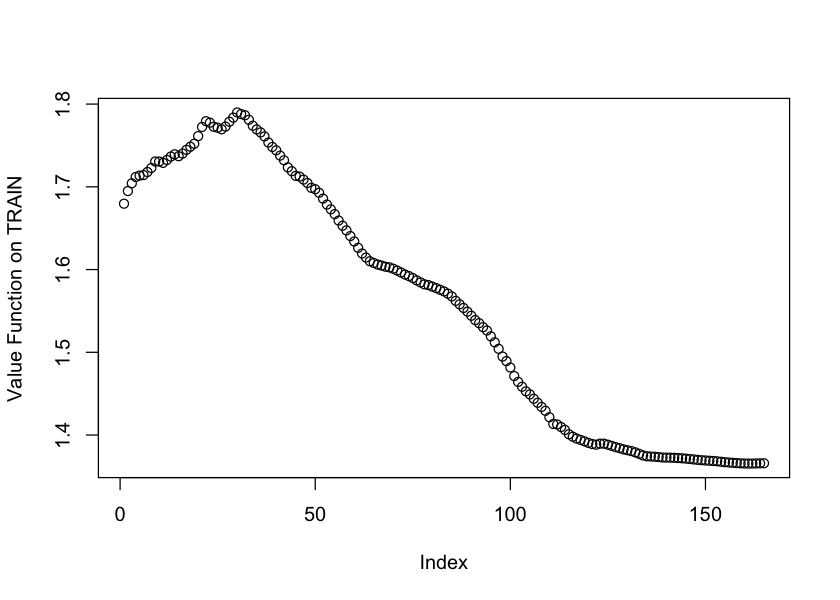

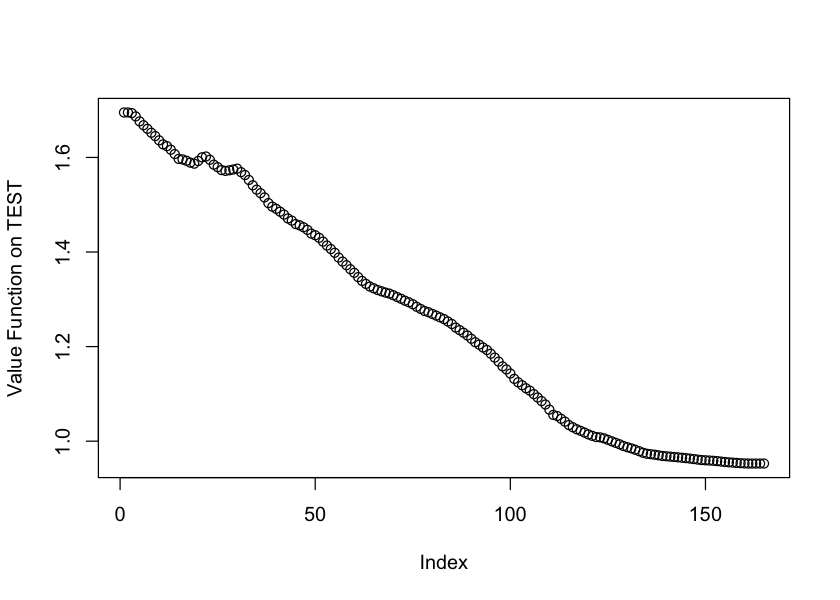

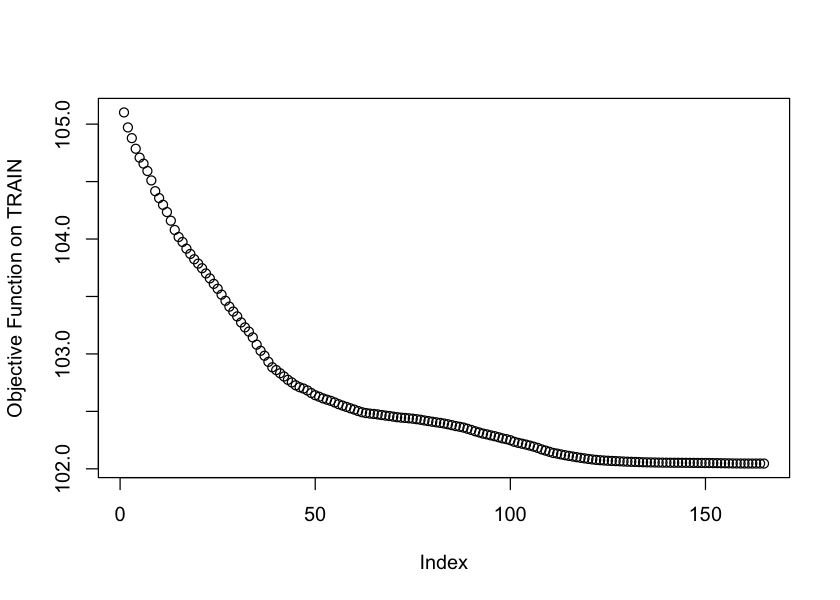

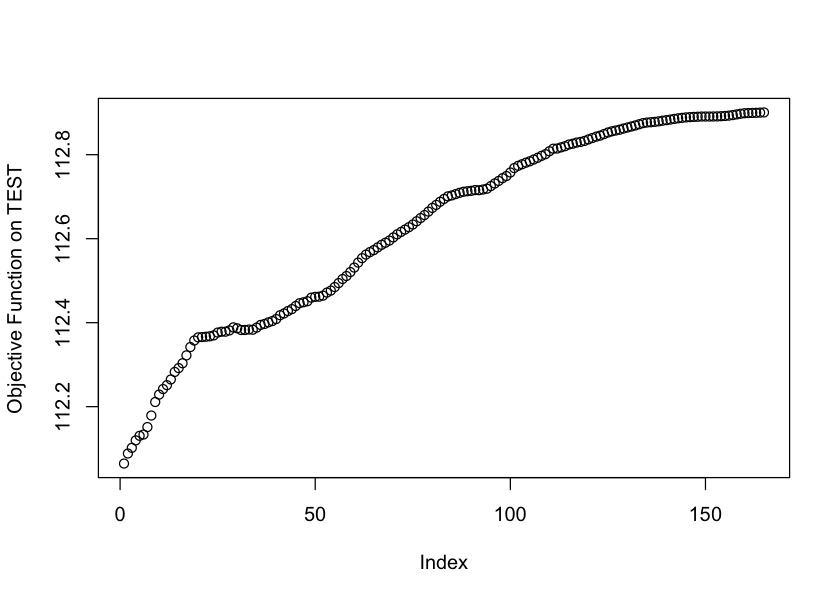

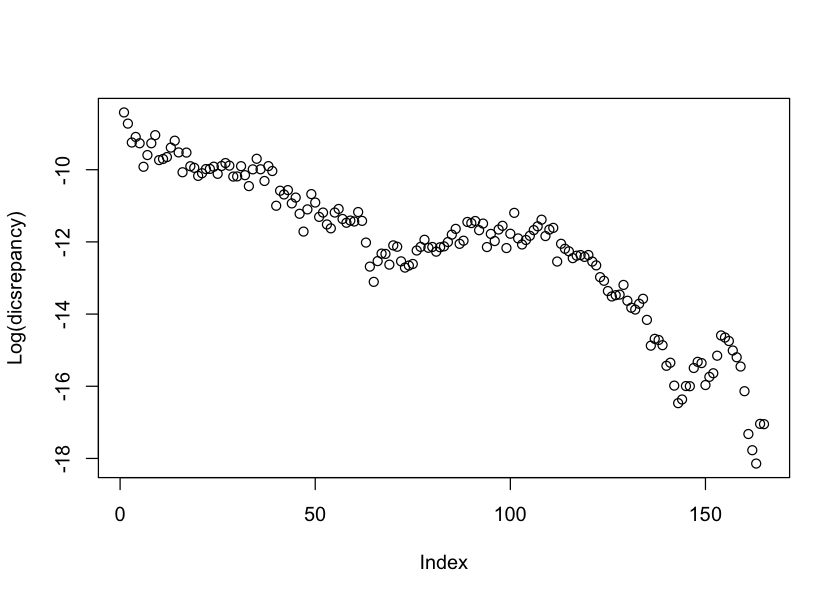

In [47]:
plot(unlist(iter.info.df$dct),              ylab="DC target function value on TRAIN")
plot(log(unlist(iter.info.df$deltadct)),    ylab="Log Delta in DC target function")
plot(unlist(iter.info.df$valuefunc.train),  ylab="Value Function on TRAIN")
plot(unlist(iter.info.df$valuefunc.test),   ylab="Value Function on TEST")
plot(unlist(iter.info.df$obj.func.train),   ylab="Objective Function on TRAIN")
plot(unlist(iter.info.df$obj.func.test),    ylab="Objective Function on TEST")
plot(log(unlist(iter.info.df$discrepancy)), ylab="Log(dicsrepancy)")

In [33]:
pars.dca.l1 <- OptimizeParamsOfPolicyFunction(train, offset, PolicyFunLinearKernel, lambda, 
                                           opt.hyperparams=list("opt.func"=DCOptimizeL1Penalized))
pars.gen.sa <- OptimizeParamsOfPolicyFunction(train, offset, PolicyFunLinearKernel, lambda, 
                                           opt.hyperparams=list("obj.func"=ObjectiveFunction))

It: 1, obj value: 101.8146383
.
It: 1001, obj value: 101.1453741
.
It: 1032, obj value: 100.9690557
It: 1036, obj value: 100.9394224
.
It: 1067, obj value: 100.9358884
.
It: 1098, obj value: 100.9352588
.
It: 1129, obj value: 100.9344765
.
It: 1160, obj value: 100.933863
.
It: 1191, obj value: 100.9338433
.
It: 1222, obj value: 100.9338348
.
It: 1253, obj value: 100.9338281
.
It: 1284, obj value: 100.9338233
.
It: 1315, obj value: 100.933818
.
It: 1346, obj value: 100.933817
.
It: 1377, obj value: 100.9338155
It: 1, obj value: 100.9338155
............................................It: 1, obj value: 100.9338155
............................................It: 1, obj value: 100.9338155
..........................................................

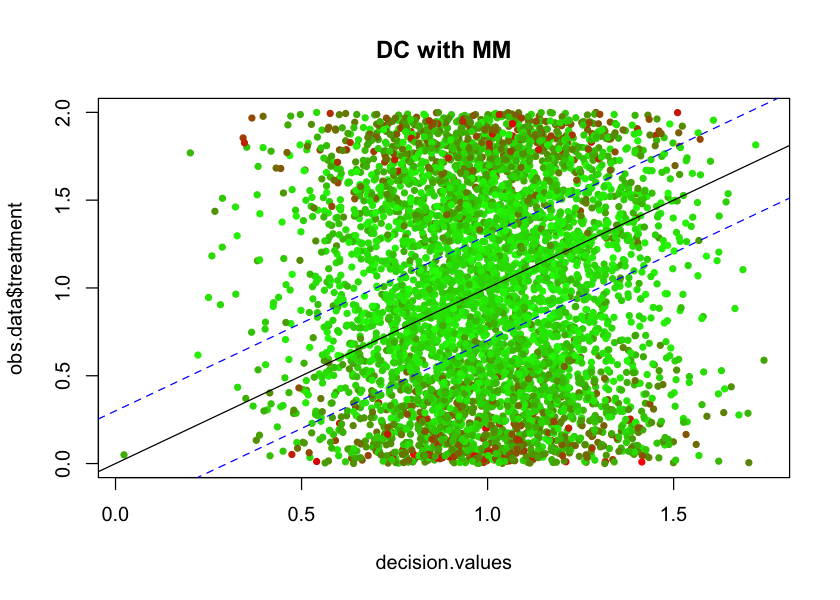

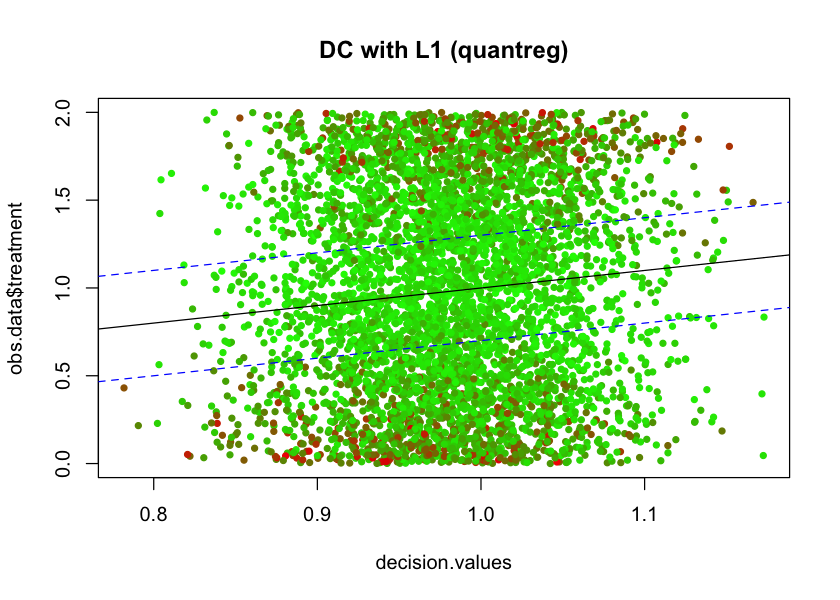

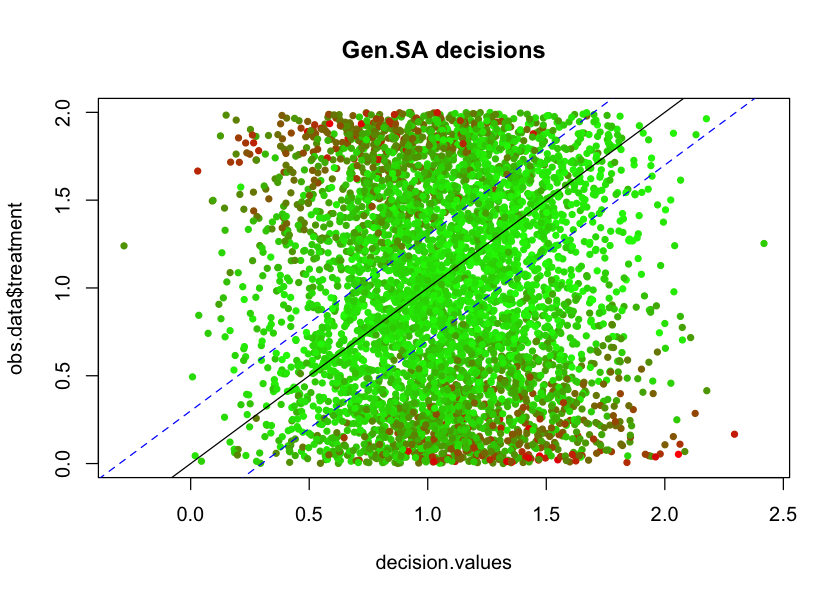

In [48]:
PlotDecsionsVersusObserved(train, PolicyFunLinearKernel, pars.dca,    offset=offset, title = "DC with MM")
PlotDecsionsVersusObserved(train, PolicyFunLinearKernel, pars.dca.l1, offset=offset, title = "DC with L1 (quantreg)")
PlotDecsionsVersusObserved(train, PolicyFunLinearKernel, pars.gen.sa, offset=offset, title = "Gen.SA decisions")

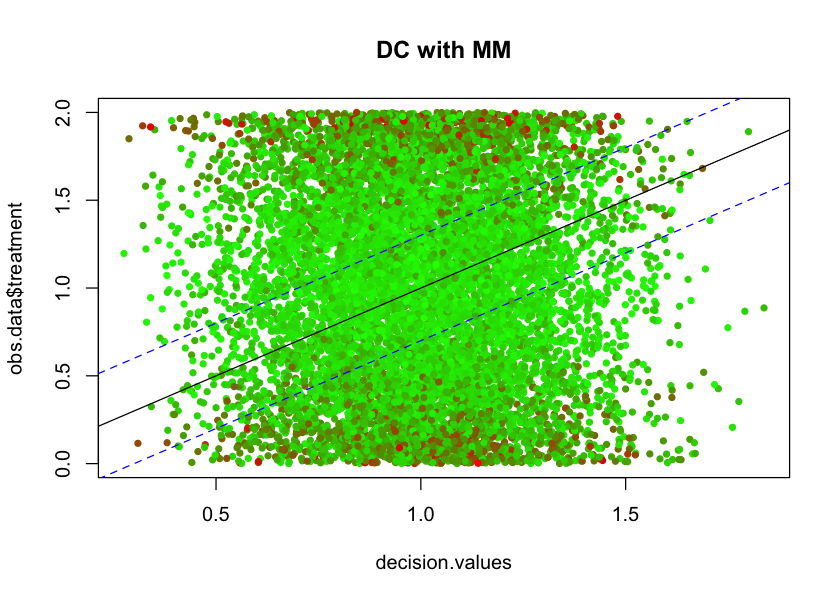

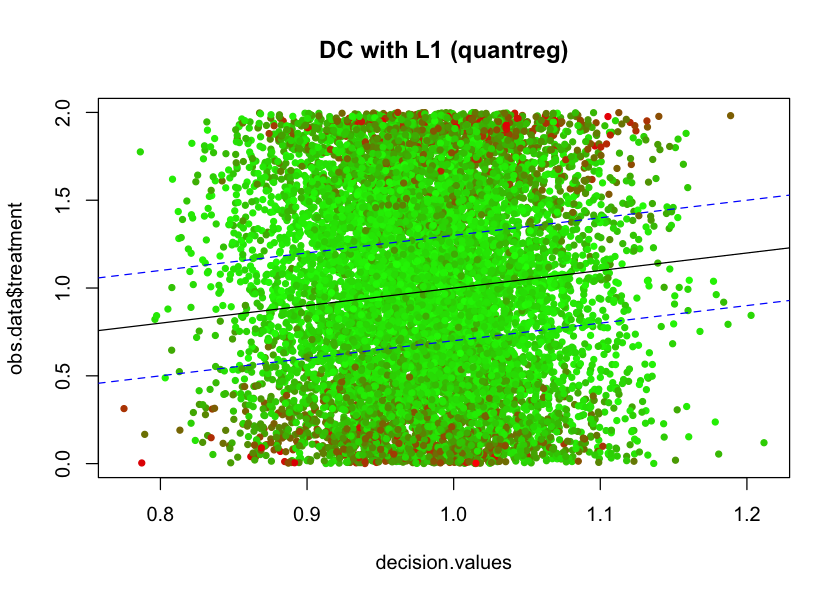

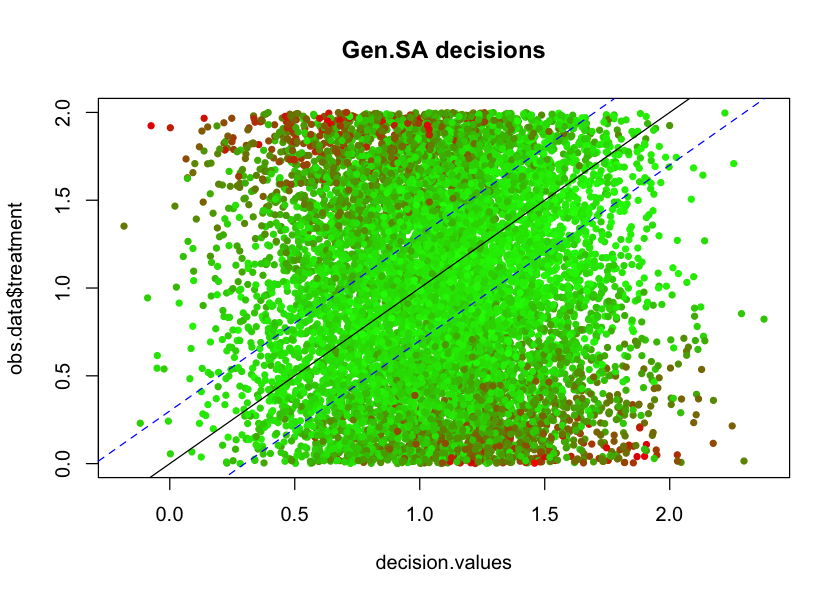

In [49]:
PlotDecsionsVersusObserved(test, PolicyFunLinearKernel, pars.dca,    offset=offset, title = "DC with MM")
PlotDecsionsVersusObserved(test, PolicyFunLinearKernel, pars.dca.l1, offset=offset,  title = "DC with L1 (quantreg)")
PlotDecsionsVersusObserved(test, PolicyFunLinearKernel, pars.gen.sa, offset=offset, title = "Gen.SA decisions")

In [50]:
cat("Value function on train with Simulated annealing:\n")
ValueFunction(params = pars.gen.sa, obs.data = train, offset = offset, policy.function = PolicyFunLinearKernel)
cat("Value function on train with DC with MM (handmade):\n")
ValueFunction(params = pars.dca, obs.data = train, offset = offset, policy.function = PolicyFunLinearKernel)
cat("Value function on train with DC with lasso penalized regreession (quantreg):\n")
ValueFunction(params = pars.dca.l1, obs.data = train, offset = offset, policy.function = PolicyFunLinearKernel)

Value function on train with Simulated annealing:


[1] 2.541958

Value function on train with DC with MM (handmade):


[1] 1.365911

Value function on train with DC with lasso penalized regreession (quantreg):


[1] 1.54317

In [51]:
cat("Value function on test with Simulated annealing:\n")
ValueFunction(params = pars.gen.sa, obs.data = test, offset = offset, policy.function = PolicyFunLinearKernel)
cat("Value function on test with DC with MM (handmade):\n")
ValueFunction(params = pars.dca, obs.data = test, offset = offset, policy.function = PolicyFunLinearKernel)
cat("Value function on test with DC with lasso penalized regreession (quantreg):\n")
ValueFunction(params = pars.dca.l1, obs.data = test, offset = offset, policy.function = PolicyFunLinearKernel)

Value function on test with Simulated annealing:


[1] 2.138084

Value function on test with DC with MM (handmade):


[1] 0.9527388

Value function on test with DC with lasso penalized regreession (quantreg):


[1] 1.52979

Objective Function
$$ \dfrac{1}{n} \sum_{i=1}^{n} \dfrac{R_i\cdot\ell_\phi(A_i - f(X_i))}{2\phi \cdot \pi(A_i|X_i)}  + \lambda_n ||f||^2$$

In [52]:
cat("Objective function on train with Simulated annealing:\n")
ObjectiveFunction(params = pars.gen.sa, obs.data = train, offset = offset, policy.function = PolicyFunLinearKernel, lambda)
cat("Objective function on train with DC with MM (handmade):\n")
ObjectiveFunction(params = pars.dca, obs.data = train, offset = offset, policy.function = PolicyFunLinearKernel, lambda)
cat("Objective function on train with lasso penalized regreession (quantreg):\n")
ObjectiveFunction(params = pars.dca.l1, obs.data = train, offset = offset, policy.function = PolicyFunLinearKernel, lambda)

Objective function on train with Simulated annealing:


[1] 100.9338

Objective function on train with DC with MM (handmade):


[1] 102.0458

Objective function on train with lasso penalized regreession (quantreg):


[1] 104.7165

In [53]:
cat("Objective function on test with Simulated annealing:\n")
ObjectiveFunction(params = pars.gen.sa, obs.data = test, offset = offset, policy.function = PolicyFunLinearKernel, lambda)
cat("Objective function on test with DC with MM (handmade):\n")
ObjectiveFunction(params = pars.dca, obs.data = test, offset = offset, policy.function = PolicyFunLinearKernel, lambda)
cat("Objective function on test with lasso penalized regreession (quantreg):\n")
ObjectiveFunction(params = pars.dca.l1, obs.data = test, offset = offset, policy.function = PolicyFunLinearKernel, lambda)

Objective function on test with Simulated annealing:


[1] 112.0099

Objective function on test with DC with MM (handmade):


[1] 112.9006

Objective function on test with lasso penalized regreession (quantreg):


[1] 112.1504

Ideal DTR value function =  3.820238 
Ideal Objective function =  111.5836

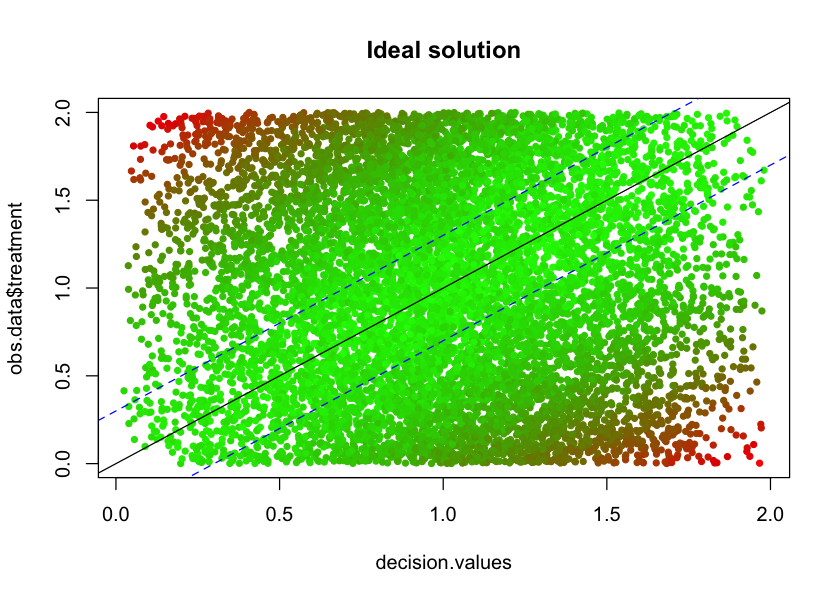

In [55]:
opt.decision <- c(1, 0.5, 0.5 , rep(0, length(pars.dca) - 3))
names(opt.decision) <- names(pars.dca)
PlotDecsionsVersusObserved(obs.data =test, PolicyFunLinearKernel, offset=offset, opt.decision, title="Ideal solution")
dtr.value.on.test.ideal <- ValueFunction(opt.decision, test, offset, PolicyFunLinearKernel)
obj.func.ideal <- ObjectiveFunction(params = opt.decision, obs.data = test, offset = offset, policy.function = PolicyFunLinearKernel, lambda)
cat("Ideal DTR value function = ", dtr.value.on.test.ideal, "\n")
cat("Ideal Objective function = ", obj.func.ideal)

# MM approxiamation algorithm stuff 

Difference at  -599959996 is  0.6668 
Max discrepancy between approx and precise tasks 5e+08 
Preciseness:   6.907755

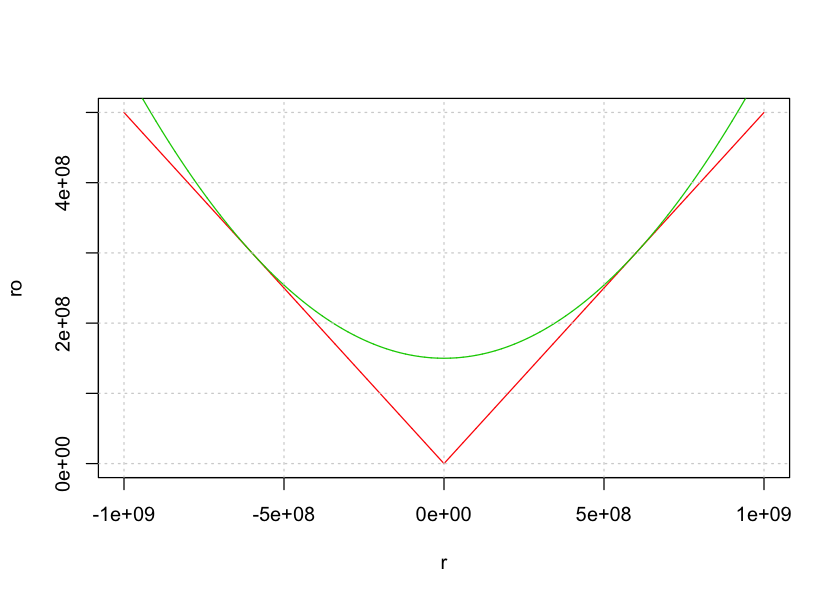

numeric(0)

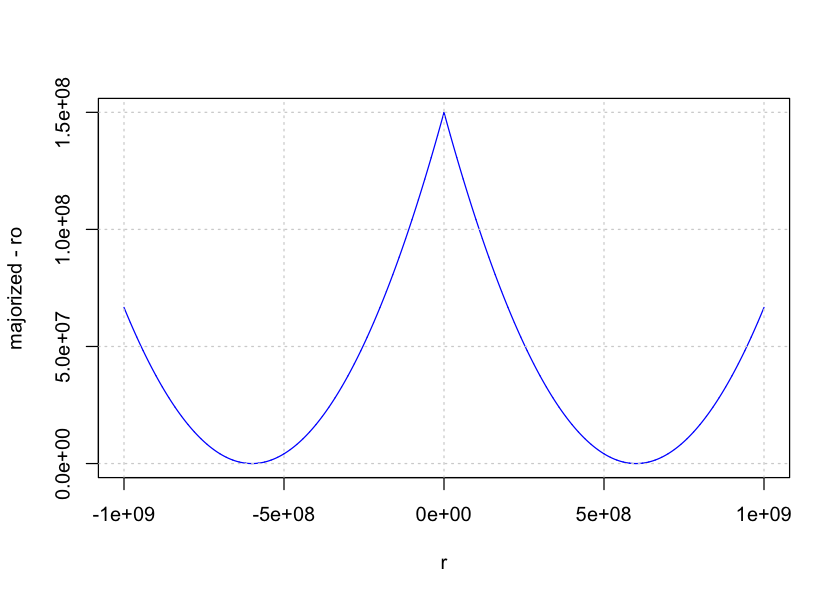

In [19]:
eps = 0.001
r = seq(from=-10, to=10, length.out = 10000)
a = 6
multiplier = 1e8
n = 1000

ro_init = 0.5 * abs(r)

r = r * multiplier
a = a * multiplier

ro = 0.5 * abs(r) - eps / 2 * log(eps + abs(r)) 
# ro = ro * multiplier 

majorized =  1 / 4 * ((r**2 + eps*abs(a)) / (eps + abs(a)) + abs(a) ) -  1 / 2 * eps * log(eps +  abs(a)) 
# majorized = majorized * multiplier

cat("Difference at ",  r[which.min(majorized - ro)],  "is ",  min(majorized - ro), "\n")
cat("Max discrepancy between approx and precise tasks", max(abs(ro_init - ro)), "\n")
cat("Preciseness:  ",  eps * n *  abs(log(eps)) )
plot(r, ro, type="l", col=2)
# lines(r, ro_init, type="l")
lines(r, majorized, type="l", col=3)
grid()
plot(r, majorized - ro, type="l", col=4)  + grid()

In [76]:
f  <- function(params, obs.data,  offset, policy.function) {
     return (0.5)
}
ValueFunction(params = pars.gen.sa, obs.data = train, offset = offset, policy.function = f)
ValueFunction(params = pars.gen.sa, obs.data = test, offset = offset, policy.function = f)

In [104]:
opt.decision <- c(1, 0.5, 0.5 , rep(0, length(pars.dca) - 3))


vf <- vector(mode="numeric")
objf <- vector(mode="numeric")

for (i in seq(1, 1000)) {
    test <- GetSimulationData(test.data.sample.size, number.of.covariates)
    params <- runif(ncol(test$covariates), min=-10, max=10)  
    dtr.value.on.test.ideal <- ValueFunction(params, test, offset, PolicyFunLinearKernel)
    obj.func.ideal <- ObjectiveFunction(params = params, obs.data = test, 
                                        offset = offset, policy.function = PolicyFunLinearKernel, lambda=0)
    vf <- c(vf, dtr.value.on.test.ideal)
    objf <- c(objf, obj.func.ideal)
    
}

In [105]:
cor(vf, objf)

[1] 0.02867977

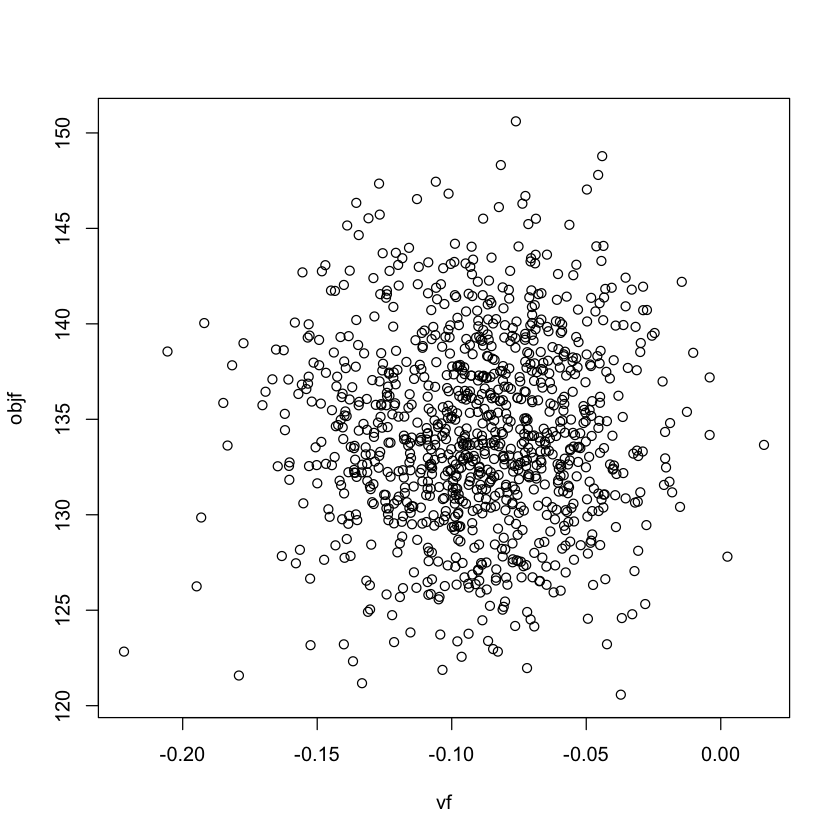

In [106]:
plot(vf, objf)

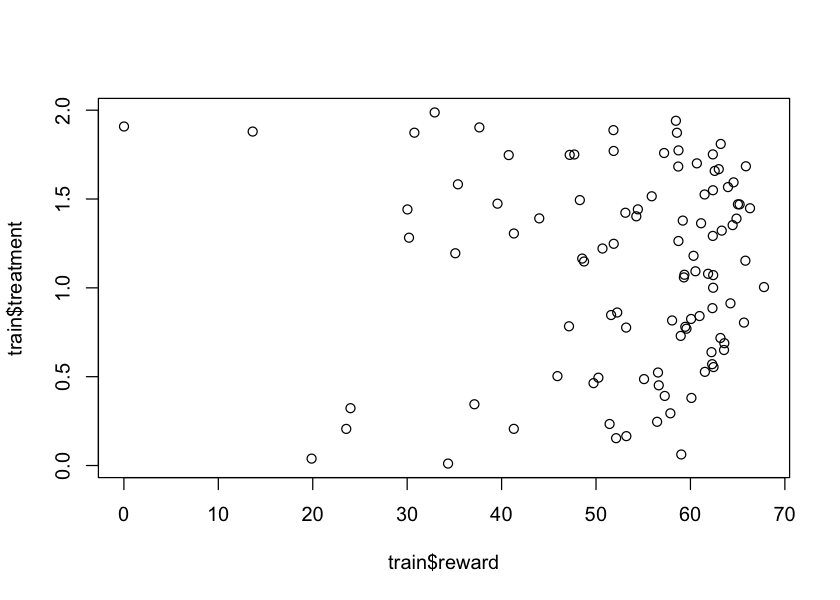

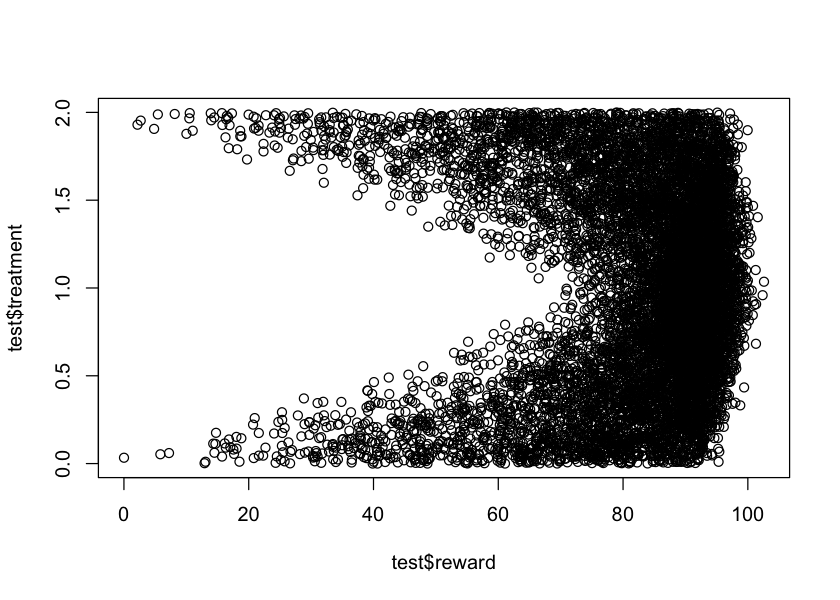

In [81]:
plot( train$reward, train$treatment)
plot( test$reward, test$treatment)

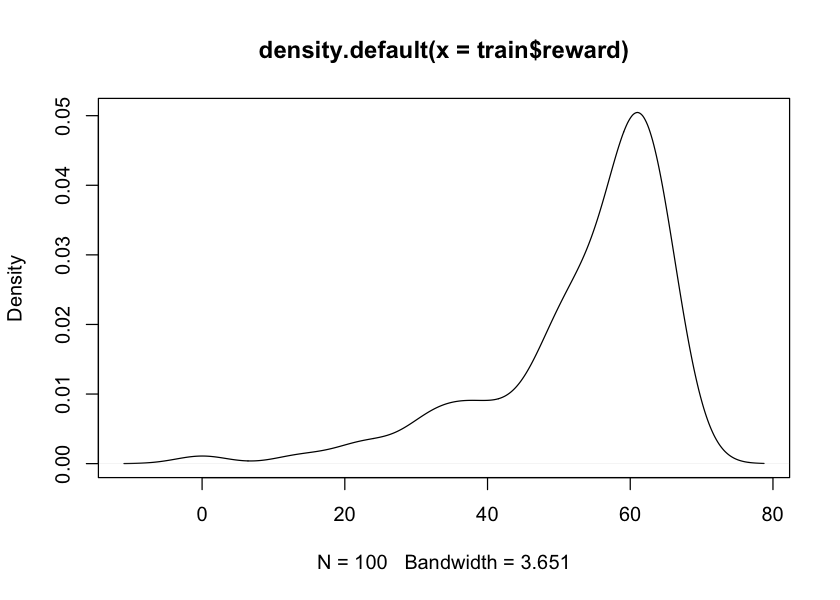

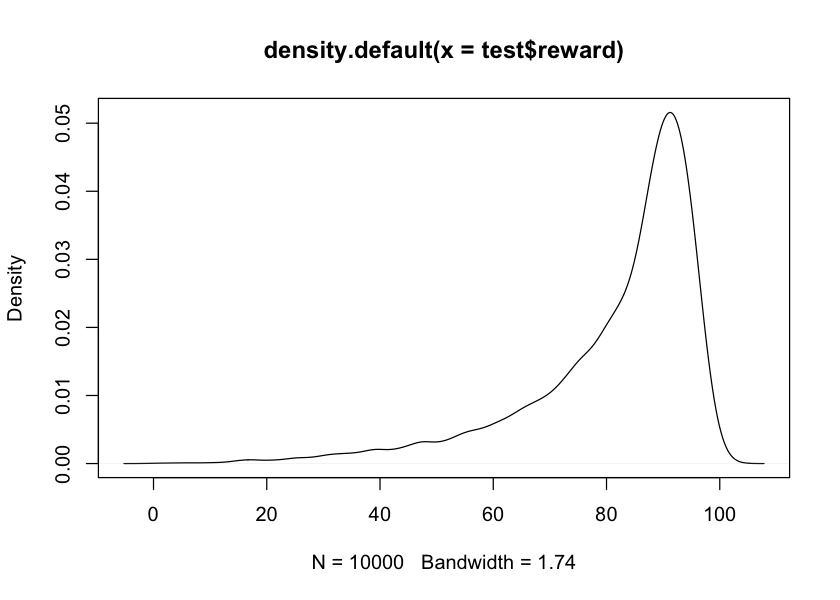

In [85]:
plot(density(train$reward))
plot(density(test$reward))